In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#dataset pre-processing into numbers
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct=make_column_transformer(
  (MinMaxScaler(), ["age","bmi","children"]),
  (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y
X=insurance.drop("charges", axis=1)
y=insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [11]:
#dividing random data into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(10),
                           tf.keras.layers.Dense(1)])# model creation

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"]) # Compilation of the model

fit=model.fit(X_train_normal, y_train, epochs=200, verbose=0)# Fitting the model

In [25]:
y_preds=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [13]:
# Evaluate the model on the test set
loss, mae= model.evaluate(X_test_normal, y_test)
print("Loss: ", loss)
print("Mean absolute error: ", mae)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3214.1992 - mae: 3214.1992  
Loss:  3161.347900390625
Mean absolute error:  3161.347900390625


In [ ]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([57.30406 , 61.02954 , 64.75502 , 68.4805  , 72.20598 , 75.93146 ,
        79.65694 , 83.382416, 87.107895, 90.833374], dtype=float32))

In [16]:
def mae(y_test, y_preds):
    return tf.keras.losses.mean_absolute_error(y_test, y_preds).numpy().mean()

def mse(y_test, y_preds):
    return tf.keras.losses.mean_squared_error(y_test, y_preds).numpy().mean()


In [15]:
def error(y_test, y_preds):
  mae_fn= tf.keras.losses.MeanAbsoluteError()
  mae= mae_fn(y_test, y_preds).numpy()
  mse_fn = tf.keras.losses.MeanSquaredError()
  mse = mse_fn(y_test, y_preds).numpy()
  print(f"Mean absolute error is: {mae}")
  print(f"Mean squared error is: {mse}")


In [27]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: nan - mae: nan


[nan, nan]

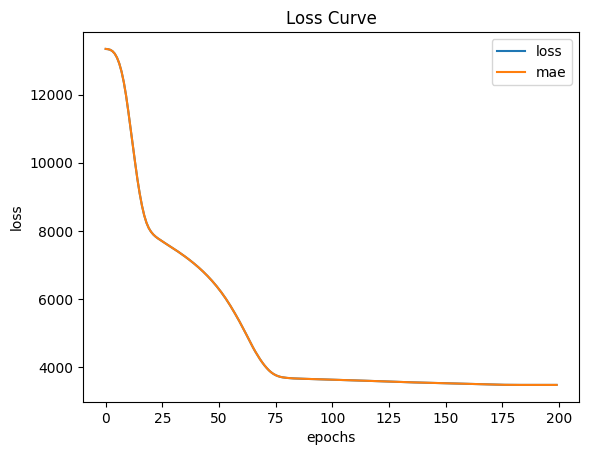

In [14]:
#Plotting loss curve
pd.DataFrame(fit.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss Curve");
